# 개요

* 아래의 목적/이유로 참가한 스터디에 대한 기록
  * SQLD취득 후 장기 미사용 & GPT를 통한 SQL사용 등으로 많이 잊은 SQL을 복기
  * 기존에 사용해 본 Optuna가 아닌 Autogluon이 커리큘럼에 있어 익혀보고자 함
  * 기존에 관심있던 XAI(설명가능한 AI)를 익히고자 함

* 5주차 요약
  * 모델을 평가하기 위한 평가Metric
    * 분류 : Accuraccy, F1-score, AUC-ROC, Log loss 등
    * 회귀 : MSE, RMSE, MAE, MAPE 등
  * SHAP(Shaply Value)를 통한 모델(변수) 설명 

# 4주차 과제 내용정리

* 모델별로 각자 잘 푸는 문제가 다름을 인지하자
  * Random Forest가 오래된 모델이지만, 성능이 좋은편임

# 5주차 수업정리

## Metric

* Metric : 모델을 평가하기 위해 사용하는 수치 지표

### 분류 문제 Metric

* `Accuracy` : 전체 예측 중 옳게 예측한 비율
  * 해석이 용이함. **불균형 데이터에서 과대평가 문제**가 있음
  * $\frac{TP + TN}{TP + TN + FP + FN}$
* `F1-score` : Precision과 Recall의 조화평균
  * **TP중심(TP Oriented)이고 직관적이지 못한 단점**
  * **불균형 데이터의 Accuracy의 과대평가를 피할 수 있는 장점**
  *  $F1 \text{ Score} = 2 \times \left( \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \right)$
  * $\text{Precision} = \frac{TP}{TP + FP}$
  * $\text{Recall} = \frac{TP}{TP + FN}$
* `AUC-ROC` : ROC커브의 하단 면적
  * 전반적인 분류 성능평가에 용이 (상대적으로)불균형데이터에서도 유용
  * ROC커브에 대한 설명이 필요하여 직관적이지 못함
* `Log loss` : Loss의 로그값으로, 0 이상이며 낮을수록 높은 신뢰도
  * 다른 Metric과 달리 예측 확률의 신뢰도에 대한 평가
    * 예측이 얼마나 적중했는지를 보는 `다른 Metric` **vs** 예측확률이 얼마나 믿을만한지 보는 `Log loss`
    * 분류 결과만으로 평가하는 `다른 Metric` **vs** 확률까지 반영하는 `Log loss`
    * 틀린 확률이 극단적인 경우 큰 패널티 부여
      * 예를 들어, 모델이 확인을 가지고 1일 확률 99%로 예측했으나 0인 경우 Log loss값 커짐
      * 이러한 특성으로 모델의 잘못된 예측을 방지하는데 유용
  * 다른 metric과 달리 다중분류에서도 사용 가능
    * class불균형 영향을 받으므로 가중치 조절 필요
  * $\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]$

### 다중 분류 문제 Metric

* `Overall Accuracy` : 전반적인 정확도(전체 예측 중 올바른 예측 비율)
  * 불균형데이터에서는 부적합
  * 3*3 Matrix기준으로 대각선이 정답이며, 이 대각선이 하단의 $\text{Number of Correct Predictions}$에 해당
  *  $\text{Overall Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Number of Total Predictions}}$
* `Macro Precision/Recall/F1-Score` : 각 class(y)별로 Precision/Recall/F1-Score를 계산한 후 평균
  * **숫자가 많은 class를 잘맞추는게 중요한게 아니라, 중요도를 균등하게 반영, 전반적인 예측을 중요시**
  * **위와 같은 이유로 불균형에 취약함**
  *  $\text{Macro Precision, Recall, F1-Score} = -\frac{1}{M} \sum_{i=1}^{M} \left[ \text{Precision, Recall, F1-Score} \right]_i$
* `Micro Precision/Recall/F1-Score` : 각 class(y)에 대해 맞게 예측한 수(TP)/ 모든 class(y)에 대해 예측한 수
  * **(단순평균이 아니므로)상대적으로 불균형에 강함, 거시적으로 보기는 어려움**
  * $\text{Micro Precision} = \frac{\sum_{i=1}^{M} \left[ TP \right]_i}{\sum_{i=1}^{M} \left[ TP + FP \right]_i}$
* **다중분류문제의 경우, 보통 `Macro`와 `Micro`를 함께 병기하여 사용**
  * 불균형한 경우, 한가지만 보면 문제될 수 있음

### 회귀 문제 Metric

* `RMSE(평균제곱오차)`, `MSE(평균제곱근오차)`
  * 제곱을 취하므로 **상대적으로 이상치에 민감** (이상치에 따라 크게 오차값이 튄다)
  * RMSE로 단위를 통일하여 사용하는 경우 많음 *(단**위가 통일되어 scale왜곡이 되지 않음**)
  *  $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$
  * $\text{RMSE} = \sqrt{\text{MSE}}$
* `MAE(평균절대오차)`, `MAPE(평균절대비오차, Percentage error)`
  * 절대값으로 계산하므로 SE(제곱오차)보다 **이상치에 덜 민감** (수학적으로는 깔끔하지 않음)
  * MAPE는 **백분율로 나타내기에 (예측하고자 하는 값이 일반적 범우에 있는 경우)해석이 용이함**
    * 분류문제 대비, 회귀문제 Metric은 설명이 어려움(모델의 scale이나 분산등을 설명해야 함)
    * y로 나누기 때문에, y가 0에 가까워질수록 값이 튀는 문제(**MAPE는 이 문제로 사용하기 어려움**)
  * $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$
  * $\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$

### Metric 선정시 고려사항

* Metric 선정시 고려사항
  * 문제 유형
  * 데이터의 특성(불균형도, 이상치의 비중, 스케일 차이)
  * 모델의 목표, 비즈니스 맥락
  * 비교 가능성
  * 결과 해석 및 소통 용이성

### Metric 선정관련 참고사항

* 과제의 성격에 맞는 Metric의 설정이 중요함
  * 물동량 예측문제라면, Under estimate가 더 치명적임
    * Over estimate : 차를 더 부르고 끝
    * Under estimate : 급하게 차를 불러야 하므로 비용이 더 큼
  * 위와 같은 상황에서 Pinball loss라는 것을 사용하기도 함
    * Pinball loss : 과소예측과 과대예측에 대해 각각 다른 가중치를 부여
    * 분위수(τ) 0.5(균형)을 기준으로, τ<0.5는 과대예측에 큰 패널티, τ>0.5는 과소예측에 큰 패널티
    * 재고관리, 금융리스크모델링 등에서 활용
* **학습하기 위한 Main metric과, 소통을 위한 Sub metric을 함께 설정**

## XAI

### XAI와 금융데이터

* `XAI(Explainable AI)` : 기존의 Black box였던 모델 부분을 설명하는 방법론들을 통칭
* (예시로 이해하는) XAI가 금융 데이터 분석에서 중요한 이유(예시)
  * 편향탐지 : AI기반 대출 승인 모델을 돌렸는데 특정 인종(흑인 등)이 거절되는 경우를 탐지
    * Feature importance는 영향도를 보여줄 뿐, 어떤 방향으로 작용할지 확인이 어려움
    * XAI로 미리 확인하여, 흑인이면 대출을 안해준다는 사실을 알았다면 문제를 방지할 수 있었음
    * **XAI로 어떤 변수가 얼마나 어떻게 중요한지 설명/적용하는 것과, 단순히 변수가 중요하다는 것은 다름**
  * 비즈니스 의사결정 지원 : 변수가 어떻게 작용하는지 이해하여 사기 탐지 모델을 적용
    * 모델링하여 단순히 Batch를 태우기도 하지만, **분석과제로 인사이트를 얻고 커뮤니케이션을 할 수 있음**
  * 데이터 처리 신뢰성 확보 및 손실 최소화
    * 모델 오류가 발생하기 전에, XAI를 통해 도메인 지식에서 어긋나는 변수나 과대대표되는 변수를 확인
    * 단위가 큰 금융 데이터에게는 특히 중요한 작업
  
### SHAP (XAI with SHAP)

* `SHAP` : **변수가 예측에 기여하는 정도를 계산** (Shapley Value에 기반하여 설명)
  * 계산방식
    * 모든 가능한 Feature 조합을 생성한 뒤
    * 각 조합에서 특정 Feature가 추가되었을 때 예측값의 변화를 계산
    * 기여도 계산 후 평균을 내는 방식으로 최종 산출
* SHAP의 해석
  * 해당 변수가 추가되었을 때 예측 값 변화의 평균이므로, **회귀계수와는 다름**
    * 변수만큼 증가하는 회귀계수 **vs** 변수의 단위만큼 증가하는 Shapley value
  * Shapley value는 **단위의 영향을 받는 값**
    * 파산확률 추론 분류모델 예시로 이해하기
      * 변수 A의 Shapley value가 0.1 → 변수 A의 추가로 파산 확률이 10%p 증가
      * 변수 B의 Shapley value가 -0.2 → 변수 B의 추가로 파산 확률이 20%p 감소
    * 대출한도 추론 회귀모델 예시로 이해하기
      * 변수 C의 Shapley value가 2백만 → 변수 C가 고객의 대출 한도를 2백만원만큼 감소시키는데 기여함

### SHAP의 해석분해

* SHAP의 해석분해 (해석분해 : 모델의 예측 값을 구성 요소(특성)별로 분리하여 설명)
  * $예측값 = SHAP기준값 + \sum_{i=1}^{n} \text{SHAPE}(\text{feature}_i) $
    * 예측값 = SHAP기준값 + SHAP값 전체의 합
    * SHAP 기준값 : 모델이 아무런 정보가 없을 때의 예측값
      * 회귀문제 : 모든 데이터의 평균 / 분류문제 : 전체 데이터 확률 평균의 로그 오즈(에 근사한 값)
    * 기준값에서 시작해, 각 변수의 Shapley value를 더해 예측값을 나타냄
  * SHAP는 각각의 예측(Row)에 종속적 (100명을 예측한다면 변수별로 100개의 SHAP)
  * 절대값의 평균 = SHAP을 통해 구한 Feature importance
    * 여러가지 방법으로 Global / Local하게 해석 가능
  * 요약
    * SHAP은 row단위의 값이며, 평균냈을 때 feature importance, 변수 유무에 따른 값의 변화를 나타냄
    * 예를 들어, MxN개의 관측값이 있는 표라면, MxN개의 Shapley value가 나옴
      * 컬럼단위로 절대값의 평균을 내면, 해당 컬럼의 feature importance
      * ROW단위로 더해 SHAP기준값까지 더해주면 예측값이 됨
* 추가사항
  * SHAP은 트리모델과 달리 feature importance의 일관성이 있음
    * 트리모델은 feature importance가 변수의 추가/삭제에 따라 크게 바뀜
      * 트리모델이 feature importance구하는 방법이, 변수가 분기에서 얼마나 사용되고, 많은 데이터를 나눌 수 있는지이기 때문
    * SHAP은 변수의 예측력 차이이므로 크게 달라지지 않음(일관성있음)
  * SHAP는 각 변수의 설명력을 나타냄

### SHAP의 Global 해석 (Column)

* `SHAP Summary Plot`
  * **Top변수들(SHAP 절대값의 합 Top)**의 SHAP value를 시각화한 것
  * SHAP Summary Plot샘플을 통한 이해<br>
    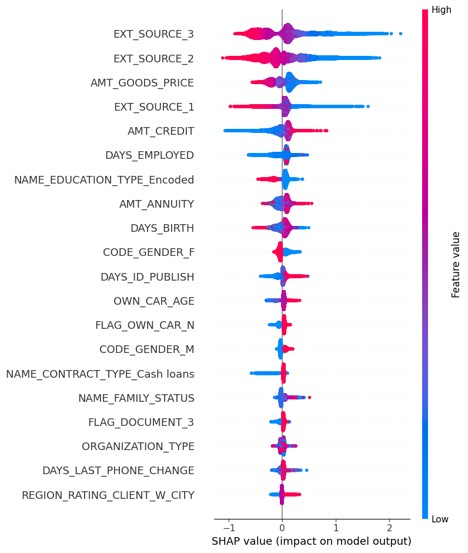
    * 색이 푸를수록 값이 낮고 / 붉을수록 값이 높음
    * EXT_SOURCE_3 변수 : 모델에 추가될 때, 값이 낮을수록 모델OUTPUT증가(X축)
    * AMT_CREDIT 변수 : 모델에 추가될 때, 값이 높을수록 모델OUTPUT증가(X축)
    * EXT_SOURCE_3 변수처럼 색이 일관될수록, 변수의 영향도 일관된 방향으로 작동
* `SHAP Feature Importance Plot`
  * **SHAP 절대값의 평균**을 시각화한 것(Feature Importance를 SHAP으로 나타낸 것)
    * `SHAP Summary Plot`에서 일관되지 못한 변수였다면, 상위에 나타나지 않음
  * 절대적인 크기를 구하기 위해 **방향성을 삭제했다는 한계**
  * SHAP Feature Importance Plot샘플<br>
    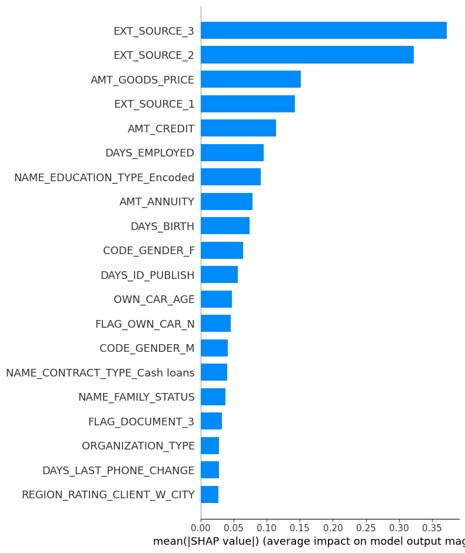
* `SHAP Dependence Plot`
  * **Row별 SHAP value와 변수값**을 시각화한 것
  * SHAP Dependence Plot샘플을 통한 이해<br>
    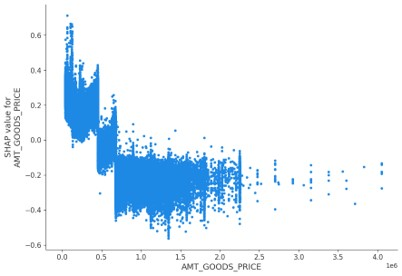
    * AMD_GOODS_PRICE변수는, 값이 증가할수록 예측(y)에 양의 영향을 끼침
      * 5만~15만쯤에 위치한 '임계값'부터 방향이 바뀜
      * 만약 이 변수에 대해 조치(행동)한다면 이 값(threshold, 임계값)을 참고해야 함
  * SHAP Dependence Plot샘플을 통한 이해2<br>
    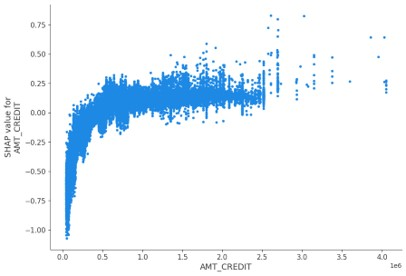
    * AMT_CREDIT변수는, 값이 작을때는 음의 영향
      * 5만~25만의 임계점부터 양의 방향으로 바뀜

###  SHAP의 Local 해석 (Row)
      
* `SHAP Force Plot`
  * 특정 데이터 하나(row)에서, 각 변수가 끼치는 영향을 1차원 평면에 정렬하여 시각화한 것
  * `SHAP Force Plot샘플을 통한 이해<br>
    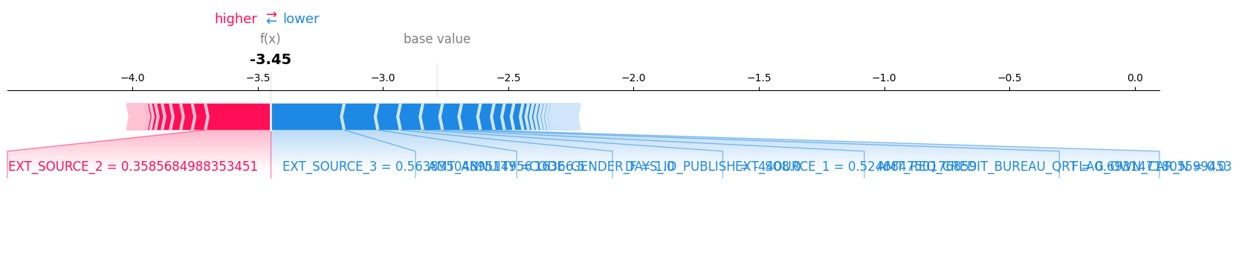
    * Base value를 기준으로 파란색은 부정적 / 빨간색은 긍정적 영향을 끼친 변수
    * 전체적으로 파란색이 더 많아, Base value에 비해 예측(y)값이 줄어든 것 (로그오즈 기준)

### Feature Selection with SHAP

* Feature Selection with SHAP
  * 각 feature의 절대값의 평균을 기반으로 계산
    * 값이 클수록 중요한 기여
  * 분할 횟수나 분산 감소를 기준으로 계산되는 트리모델의 Feature importance과 다른 점
    * SHAP Feature importance는 실제 y와 연관성이 명확히 보이고 설명하기 쉬움
      * SHAP값의 합 = 모델의 예측값 이기 때문.
  * **뚜렷한 방향성을 갖거나, 변수유무에 따른 변동폭이 클수록 Feature importance 증가**

### 참고사항

* SHAP가 가장 많이 사용되고 직관적이며, 다른 XAI로는 LIME 등도 있음
* SHAP은 변수의 관계(a변수 증가시 어느정도 y증가)를 직관적으로 설명 가능
  * 분할 횟수나 분산 감소로 계산되는 트리모델의 Feature importance로는 단위통일 등 되어있지 않고 해석이 어려움
* 분류문제의 SHAP는 로그오즈 형태로 나오지만, 회귀문제의 SHAP는 숫자로 나옴
* SHAP Dependence Plot을 통해, 현재까지 몰랐던 모델의 input/output 사이의 작용을 알게됨
  * 모델이 어떻게 반영해왔는지에 대한 경향을 알 수 있음
  * XAI시각화를 통해, 모델링으로 해결할만한 과제가 아님을 인지하게되어 추가로 DA적인 분석 등 조치가능

## Week4 보완 : XGBoost의 RF w/ GPU

* XGBoost와 SKlearn은 목적함수에 차이가 있어, 독립적 트리 기반의 모델인 RF에서 성능차이가 있을 수 있음
  * 목적함수의 차이
    * XGBoost : (목적합수의 정확한 값 대신) 2차 근사 (1차gradient미분, 2차hessian미분). 근사는 계산량을 줄이는데 효과적
    * SKlearn : 목적함수의 정확한 실제값 (정확한 손실함수 값)
  * SKlearn은 분할기준을 정확히 최적화하지만, XGBoost는 근사 최적화여서 개별 트리 성능이 저하될 수 있음

* XGBoost는 중복샘플링을 수행하지 않음(subsample시 replacement를 수행하지 않음, 각 트리가 고유한 서브셋을 사용함)
  * 중복샘플링은 각 트리가 원본데이터와 다른 구조/분포를 갖게 해 각 트리의 독립성, 다양성이 높아져 일반화 성능이 높아짐(Bagging에 적합)
  * Boosting은 순차적 학습이므로, 중복허용시 특정 샘플이 과도하게 중복되거나 포함되지 않아 안정성이 낮아짐
  * **위의 이유로 XGBoost와 SKlearn은 다르게 학습되며, XGBoost의 RF는 XGB알고리즘에 따라 성능상의 Penalty가 있음**

### 더미데이터를 활용한 비교 실습(XGBoost vs Sklearn)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Dummy 분류데이터 생성
## Generate a large synthetic dataset
X, y = make_classification(n_samples=100000, n_features=100, n_informative=25,
                           n_redundant=10, n_classes=2, random_state=42)

## Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)
pd.DataFrame(y_test).value_counts()

(100000, 100)


0
0    10039
1     9961
Name: count, dtype: int64

In [ ]:
# 공통 하이퍼파라미터 설정 (설정 후 Sklearn과 XGBoost에서 사용)
params = {
    # "n_estimators": 100,      # 트리 개수
    # "max_depth": 10,          # 최대 깊이
    "random_state": 42,         # 재현성을 위한 random state
    "n_jobs": -1                # 사용하는 Thread수, -1은 최대한 사용
}

In [ ]:
# Train sklearn Random Forest
sklearn_rf = RandomForestClassifier(**params)

## fit
sklearn_fit_start = time.time()
sklearn_rf.fit(X_train, y_train)
sklearn_fit_time = time.time() - sklearn_fit_start

## predict
sklearn_predict_start = time.time()
sklearn_rf_preds = sklearn_rf.predict(X_test)
sklearn_predict_time = time.time() - sklearn_predict_start

sklearn_rf_accuracy = accuracy_score(y_test, sklearn_rf_preds)

In [ ]:
# Train XGBoost Random Forest
xgb_rf = xgb.XGBRFClassifier(
    # n_estimators=params["n_estimators"],
    # max_depth=params["max_depth"],
    random_state=params["random_state"],
    verbosity=0,
    n_jobs=params["n_jobs"],
    tree_method='gpu_hist',      # GPU 사용
    subsample=1.0,               # 전체 샘플 사용
    colsample_bynode=1.0         # 전체 피처 사용
)

## fit
xgb_fit_start = time.time()
xgb_rf.fit(X_train, y_train)
xgb_fit_time = time.time() - xgb_fit_start

## predict
xgb_predict_start = time.time()
xgb_rf_preds = xgb_rf.predict(X_test)
xgb_predict_time = time.time() - xgb_predict_start

xgb_rf_accuracy = accuracy_score(y_test, xgb_rf_preds)

In [ ]:
# Summarize results
print(f'Sklearn Random Forest Accuracy: {sklearn_rf_accuracy:.4f}')
print(f'Sklearn Random Forest Fit Time: {sklearn_fit_time:.4f} seconds')
print(f'Sklearn Random Forest Predict Time: {sklearn_predict_time:.4f} seconds')
print()

print(f'XGBoost Random Forest Accuracy: {xgb_rf_accuracy:.4f}')
print(f'XGBoost Random Forest Fit Time: {xgb_fit_time:.4f} seconds')
print(f'XGBoost Random Forest Predict Time: {xgb_predict_time:.4f} seconds')

Sklearn Random Forest Accuracy: 0.9443
Sklearn Random Forest Fit Time: 16.6355 seconds
Sklearn Random Forest Predict Time: 0.0863 seconds

XGBoost Random Forest Accuracy: 0.7635
XGBoost Random Forest Fit Time: 1.3666 seconds
XGBoost Random Forest Predict Time: 0.0480 seconds


### 실습데이터를 활용한 비교 실습(XGBoost vs Sklearn)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# data split

## 전처리해둔 데이터 로딩
data = pd.read_csv("data_preprocessed.csv")

## 데이터셋 나누기
train , test = train_test_split(data, test_size = 0.1, random_state = 42, stratify = data['TARGET'])

X_train = train.drop(['TARGET'], axis = 1)
y_train = train['TARGET']
X_test = test.drop(['TARGET'], axis = 1)
y_test = test['TARGET']

In [ ]:
# Train sklearn Random Forest
sklearn_rf = RandomForestClassifier(**params)

## fit
sklearn_fit_start = time.time()
sklearn_rf.fit(X_train, y_train)
sklearn_fit_time = time.time() - sklearn_fit_start

## predict
sklearn_predict_start = time.time()
sklearn_rf_preds = sklearn_rf.predict(X_test)
sklearn_predict_time = time.time() - sklearn_predict_start

sklearn_rf_accuracy = accuracy_score(y_test, sklearn_rf_preds)

In [ ]:
# Train XGBoost Random Forest
xgb_rf = xgb.XGBRFClassifier(
    # n_estimators=params["n_estimators"],
    # max_depth=params["max_depth"],
    random_state=params["random_state"],
    verbosity=0,
    n_jobs=params["n_jobs"],
    tree_method='gpu_hist',      # GPU 사용
    subsample=1.0,               # 전체 샘플 사용
    colsample_bynode=1.0         # 전체 피처 사용
)

## fit
xgb_fit_start = time.time()
xgb_rf.fit(X_train, y_train)
xgb_fit_time = time.time() - xgb_fit_start

## predict
xgb_predict_start = time.time()
xgb_rf_preds = xgb_rf.predict(X_test)
xgb_predict_time = time.time() - xgb_predict_start

xgb_rf_accuracy = accuracy_score(y_test, xgb_rf_preds)

In [ ]:
# Summarize results
print(f'Sklearn REAL DATA Random Forest Accuracy: {sklearn_rf_accuracy:.4f}')
print(f'Sklearn REAL DATA Random Forest Fit Time: {sklearn_fit_time:.4f} seconds')
print(f'Sklearn REAL DATA Random Forest Predict Time: {sklearn_predict_time:.4f} seconds')
print()

print(f'XGBoost REAL DATA Random Forest Accuracy: {xgb_rf_accuracy:.4f}')
print(f'XGBoost REAL DATA Random Forest Fit Time: {xgb_fit_time:.4f} seconds')
print(f'XGBoost REAL DATA Random Forest Predict Time: {xgb_predict_time:.4f} seconds')

Sklearn REAL DATA Random Forest Accuracy: 0.9193
Sklearn REAL DATA Random Forest Fit Time: 24.7601 seconds
Sklearn REAL DATA Random Forest Predict Time: 0.2899 seconds

XGBoost REAL DATA Random Forest Accuracy: 0.9176
XGBoost REAL DATA Random Forest Fit Time: 2.6202 seconds
XGBoost REAL DATA Random Forest Predict Time: 0.0680 seconds


## Metrics

### 분류 Metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Generate example data
np.random.seed(42)  # For reproducibility
n_samples = 1000  # Number of samples

# True labels and predictions
y_true = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Balanced true labels
y_pred = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])  # Predictions with different distribution

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5050
F1 Score: 0.4660


In [ ]:
from sklearn.metrics import roc_auc_score, log_loss
import numpy as np

# Generate example data
np.random.seed(42)
n_samples = 1000

# True labels and predicted probabilities
y_true = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])  # Balanced true labels
y_pred_proba = np.random.uniform(0, 1, size=n_samples)  # Predicted probabilities

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_true, y_pred_proba)

# Calculate Log Loss
log_loss_value = log_loss(y_true, y_pred_proba)

# Display results
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

AUC-ROC: 0.5060
Log Loss: 0.9939


In [ ]:
y_pred_proba[:10]

array([0.18513293, 0.54190095, 0.87294584, 0.73222489, 0.80656115,
       0.65878337, 0.69227656, 0.84919565, 0.24966801, 0.48942496])

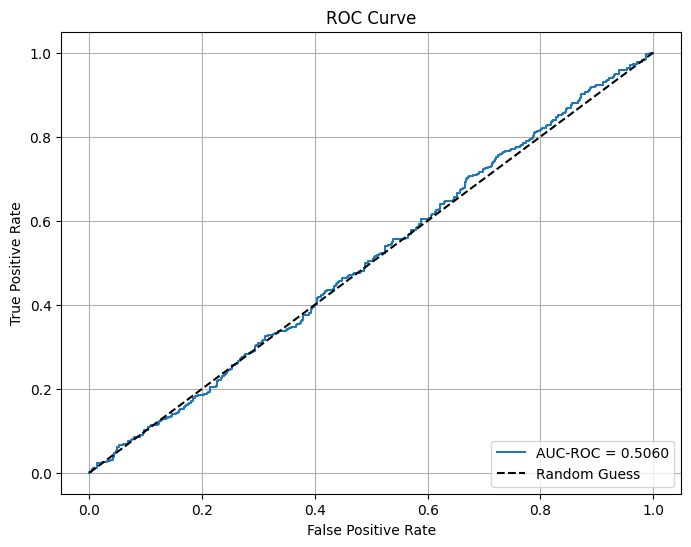

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
auc_roc = roc_auc_score(y_true, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Dashed diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 다중분류 Metrics (Multi Label)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Example data: true labels and predicted labels
np.random.seed(42)
n_samples = 1000
n_classes = 4  # Number of classes

# Generate true labels and predictions
y_true = np.random.randint(0, n_classes, size=n_samples)  # True labels
y_pred = np.random.randint(0, n_classes, size=n_samples)  # Predicted labels

In [ ]:
# Overall Accuracy
overall_accuracy = accuracy_score(y_true, y_pred)

# Macro Precision, Recall, F1-Score
macro_precision = precision_score(y_true, y_pred, average='macro')
macro_recall = recall_score(y_true, y_pred, average='macro')
macro_f1 = f1_score(y_true, y_pred, average='macro')

# Micro Precision, Recall, F1-Score
micro_precision = precision_score(y_true, y_pred, average='micro')
micro_recall = recall_score(y_true, y_pred, average='micro')
micro_f1 = f1_score(y_true, y_pred, average='micro')

# Display results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")
print(f"Micro Precision: {micro_precision:.4f}")
print(f"Micro Recall: {micro_recall:.4f}")
print(f"Micro F1-Score: {micro_f1:.4f}")

Overall Accuracy: 0.2400
Macro Precision: 0.2445
Macro Recall: 0.2402
Macro F1-Score: 0.2405
Micro Precision: 0.2400
Micro Recall: 0.2400
Micro F1-Score: 0.2400


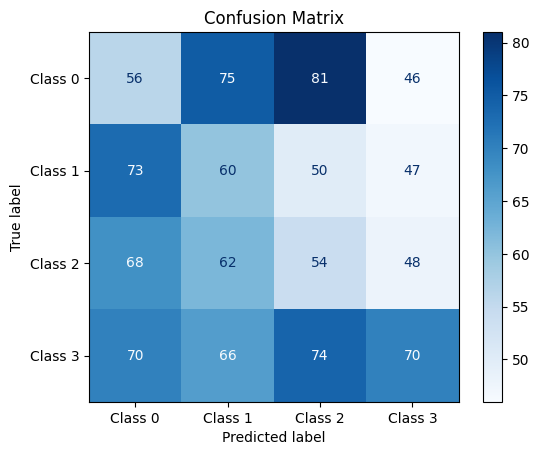

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(n_classes)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### 회귀 Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Generate example data
np.random.seed(42)
n_samples = 1000

# True values (y) and predicted values (y_hat)
y_true = np.random.uniform(10, 10000, size=n_samples)  # True values
y_pred = y_true + np.random.normal(0, 10, size=n_samples)  # Predicted values with noise

# Calculate MSE and RMSE
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
# rmse = np.sqrt(mse)


# Calculate MAE and MAPE
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Display results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

MSE: 98.6791
RMSE: 9.9337
MAE: 7.8999
MAPE: 0.0046%


* MAPE값이 튀는 경우에 대한 샘플Case (y가 0에 가까울 때)
  * 이런 문제가 있을 때는 사용할 수 없고, 설명력을 갖지 못함을 유의
  * 예를 들어, 주기적으로 0이 발생하는 택배물동량의 경우도 사용할 수 없음

In [ ]:
# Example of small true value causing high MAPE
y_true_example = np.array([0.01, 50, 100])  # Small true value included
y_pred_example = np.array([0.05, 55, 90])  # Predicted values

# Calculate MAPE
mape_example = np.mean(np.abs((y_true_example - y_pred_example) / y_true_example)) * 100

print(f"True values: {y_true_example}")
print(f"Predicted values: {y_pred_example}")
print(f"MAPE: {mape_example:.4f}%")

True values: [1.e-02 5.e+01 1.e+02]
Predicted values: [5.0e-02 5.5e+01 9.0e+01]
MAPE: 140.0000%


## XAI With SHAP

* SHAP 설치

In [ ]:
!pip install SHAP

### 트리기반 모델로 SHAP 실습하기

* 실습을 위한 모델 설정

In [ ]:
import shap
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로딩 및 나누기
data = pd.read_csv('data_preprocessed.csv')

X = data.drop(columns=["TARGET"])
y = data["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM classifier
lgb_model = lgb.LGBMClassifier(
    objective="binary",
    random_state=42,
)

lgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="logloss",
    callbacks=[lgb.early_stopping(stopping_rounds=10)],
)

# Evaluate the model
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11686
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 125
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.24629
Accuracy: 0.9198


* TreeExplainer 설정 및 SHAP value 확인
  * train에 대해서도, test에 대해서도 SHAP value확인가능
    * 다만, 기본적으로 test데이터는 unseen이어야 하므로 train에 대해서 본다

In [ ]:
# Calculate SHAP values
explainer = shap.TreeExplainer(lgb_model)

# 트레인 셋에서의 SHAP value
shap_values_train = explainer.shap_values(X_train)

# 테스트 셋에서의 SHAP value
shap_values_test = explainer.shap_values(X_test)

c:\Users\kibok\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
c:\Users\kibok\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


* SHAP value 확인하기

In [ ]:
df_shap_train = pd.DataFrame(shap_values_train, columns = X_train.columns)
df_shap_test  = pd.DataFrame(shap_values_test, columns = X_test.columns)

print(f"""* 값의 shape 확인하기
  X_train           : {X_train.shape}
  shap_values_train : {shap_values_train.shape}""")

df_shap_train.head(5)

* 값의 shape 확인하기
  X_train           : (246008, 131)
  shap_values_train : (246008, 131)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0.001434,-0.000103,-0.002647,0.040973,-0.134860,-0.037693,-0.008186,-0.036237,0.046080,-0.005266,...,0.0,-0.001680,0.000372,0.007599,-0.000594,-0.000023,0.0,0.0,0.0,0.000039
1,0.035705,0.000411,-0.002086,-0.239073,-0.055616,0.194492,-0.003785,0.052061,0.060291,0.004833,...,0.0,0.000848,-0.000106,-0.000023,-0.000032,-0.000005,0.0,0.0,0.0,-0.000012
2,0.003548,-0.000015,-0.001610,0.109762,-0.025149,-0.002882,0.113585,0.014116,-0.008174,0.003287,...,0.0,0.000834,-0.000061,0.001993,-0.000078,-0.000005,0.0,0.0,0.0,0.000370
3,0.000996,-0.000067,0.003211,0.106862,0.091010,-0.258358,0.018849,-0.011067,-0.080588,-0.009850,...,0.0,0.000839,-0.000180,0.001513,-0.000029,0.003533,0.0,0.0,0.0,-0.000012
4,0.001159,0.000270,-0.002707,0.005237,-0.021219,-0.062577,0.005898,0.041537,-0.065084,-0.003805,...,0.0,0.000812,-0.000052,0.001695,-0.000027,-0.000005,0.0,0.0,0.0,0.000019


* Base value(기준값), 특정 row의 SHAP value구하기

In [ ]:
# Get base value
base_value = explainer.expected_value  # For the positive class (1)
print(f"Base value (expected value): {base_value:.4f}")


# Select a specific row and feature
row_index = 10  # Index of the row
feature_name = "EXT_SOURCE_3"  # Name of the specific feature

## Get SHAP value for the selected feature and row
specific_shap_value = shap_values_train[row_index, X_train.columns.get_loc(feature_name)]

## Print results
print(f"SHAP value for row {row_index}, feature '{feature_name}': {specific_shap_value:.4f}")

Base value (expected value): -2.7856
SHAP value for row 10, feature 'EXT_SOURCE_3': 1.5446


* SHAP value와 Base value의 합이 예측값과 근사함을 보여주는 예제

In [ ]:
import numpy as np
import pandas as pd
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 사용자 데이터 예제 (사용자 데이터를 여기에서 불러옵니다)
# 예: 데이터프레임 `data`가 존재한다고 가정합니다
# data = pd.read_csv("your_data.csv")
# X = data.drop("target", axis=1)
# y = data["target"]

# 예제 데이터 생성 (사용자 데이터를 여기에 적용하세요)
np.random.seed(42)
X = pd.DataFrame({
    "feature1": np.random.rand(100),
    "feature2": np.random.rand(100),
    "feature3": np.random.rand(100)
})
y = 3 * X["feature1"] + 2 * X["feature2"] + X["feature3"] + np.random.randn(100) * 0.1

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = lgb.LGBMRegressor(silent = True)
model.fit(X_train, y_train)

# SHAP value의 합과 base value를 더한 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap_sum = np.sum(shap_values, axis=1) + explainer.expected_value


# 예측값
predictions = model.predict(X_test)
# 각 변수별 SHAP 값, 예측값, SHAP 합, Expected Value를 포함한 데이터프레임 생성
df_shap = pd.DataFrame(shap_values, columns=X_test.columns)

df_shap["Expected Value"] = explainer.expected_value
df_shap["SHAP Sum"] = shap_sum
df_shap["Prediction"] = predictions

In [ ]:
# feature1,	feature2, feature3 : 변수 3종
# Expected Value : Base Value
# SHAP Sum : 위 4가지 값의 합
# Prediction : 예측값
df_shap.head(5)

,feature1,feature2,feature3,Expected Value,SHAP Sum,Prediction
0,-1.116524,0.727300,-0.301556,2.953377,2.262596,2.262596
1,1.175684,-0.358968,-0.228965,2.953377,3.541127,3.541127
2,1.059330,0.362629,0.215773,2.953377,4.591108,4.591108
3,0.430526,-0.687566,0.238544,2.953377,2.934881,2.934881
4,-0.660002,-0.460247,-0.347192,2.953377,1.485935,1.485935


In [ ]:
# 검증: 두 값의 차이가 거의 0인지 확인
difference = np.abs(df_shap["Prediction"] - df_shap["SHAP Sum"])
print(f"Difference Mean: {difference.mean()}, Max Difference: {difference.max()}")

Difference Mean: 1.5931700403370996e-15, Max Difference: 4.440892098500626e-15


### SHAP시각화

* 대표적으로 많이 사용되는 3가지 예시
  * Summary Plot, Feature Importance Plot, Dependence Plot
  * SHAP를 Global하게 해석(컬럼 기준)

#### SHAP Global해석 : SHAP Summary Plot(Violin Plot)

* 아래 그래프에서의 높이(너비) : 점의 수가 많고 적음을 알 수 있음

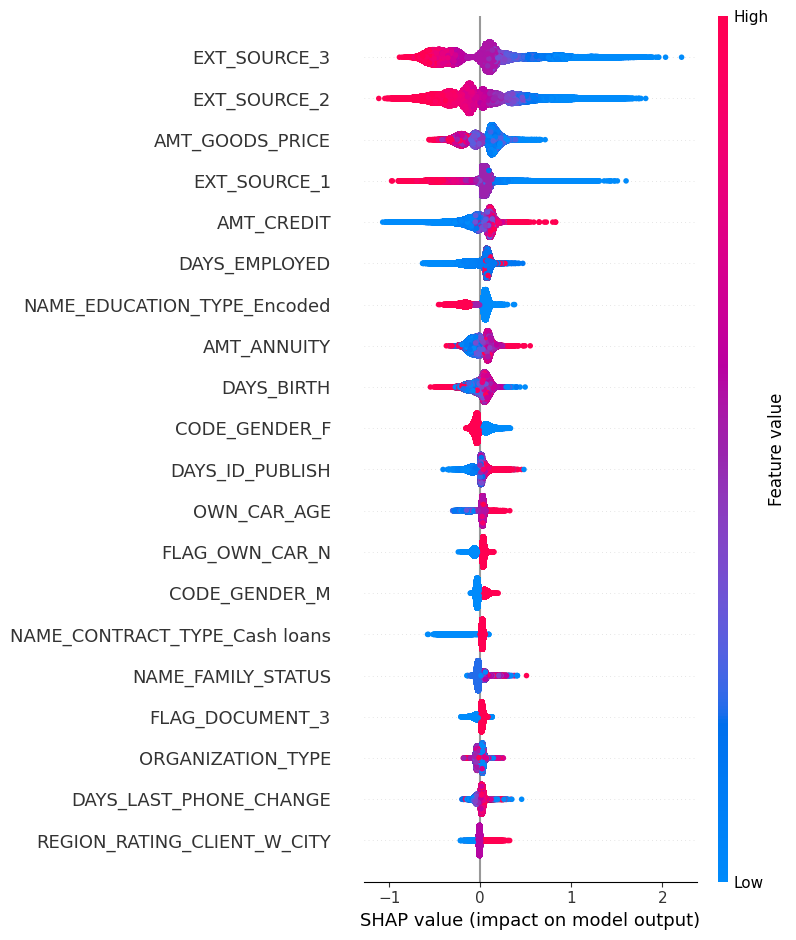

In [ ]:
# Visualize SHAP summary plot for the positive class
shap.summary_plot(shap_values_train, X_train, feature_names=X.columns)

#### SHAP Global해석 : SHAP Feature Importance Plot(Bar Plot)

* 절대값이므로 방향성이 제거됨
* 위의 Summary Plot보다는 청중을 이해시키기 쉬움

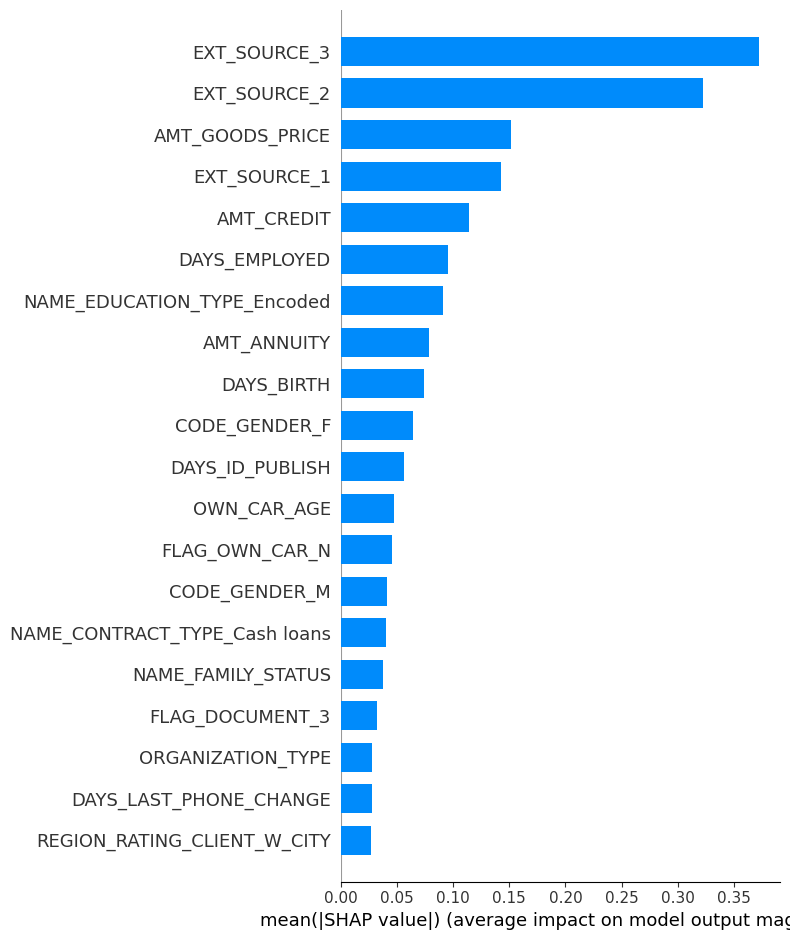

In [ ]:
shap.summary_plot(shap_values_train,
                  X_train,
                  plot_type='bar')

#### SHAP Global해석 : SHAP Dependence Plot(Scatter Plot)

* 임계점을 확인하여 변수에 조치 등을 취할 수 있음

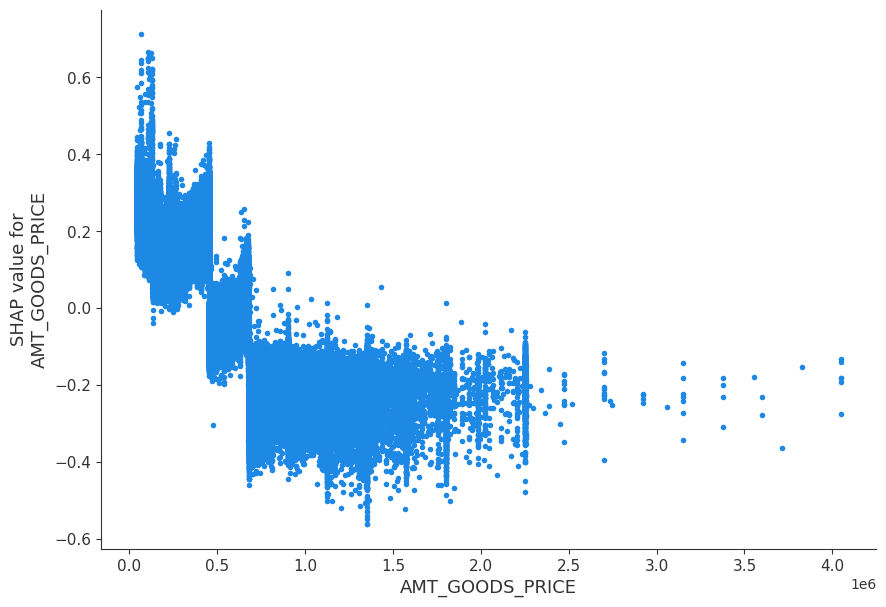

In [ ]:
# AMT_GOODS_PRICE의 TAGRGET에 끼치는 영향
## 해석 예시 : 하단 그래프는 5만(0.5)을 기점으로 음의 영향이 있다

fig, ax = plt.subplots(1, 1, figsize=(10,7))
shap.dependence_plot("AMT_GOODS_PRICE", shap_values_train, X_train, interaction_index=None, ax=ax)

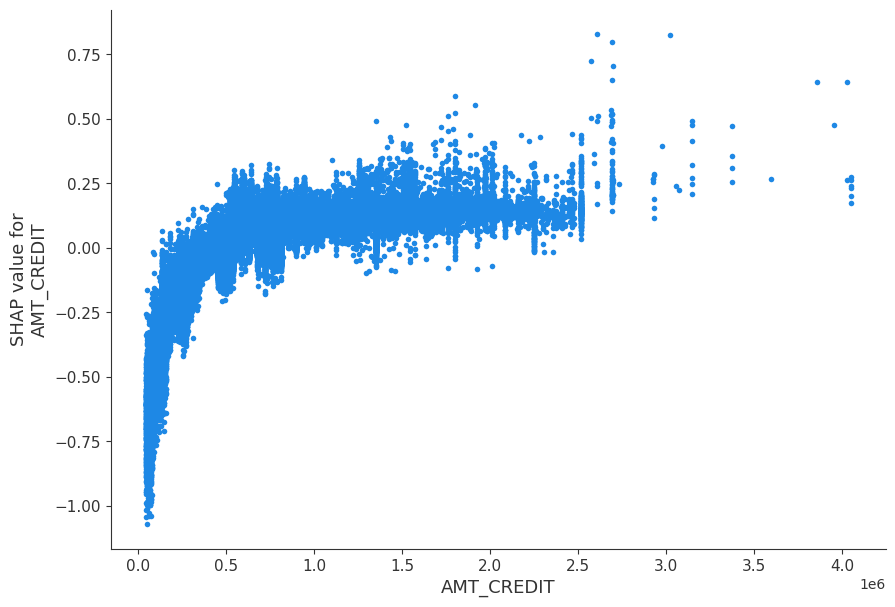

In [ ]:
# AMT_CREDIT이 TAGRGET에 끼치는 영향
## 해석예시 : 5만(0.5)~25만(2.5)까지 양의 영향을 끼친다

fig, ax = plt.subplots(1, 1, figsize=(10,7))
shap.dependence_plot("AMT_CREDIT", shap_values_train, X_train, interaction_index=None, ax=ax)

#### SHAP Local해석 : SHAP Force Plot

* 특정 row에서의 각 변수가 미치는 영향을 시각화

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
# Colab으로 실행시에만 위의 코드 실행

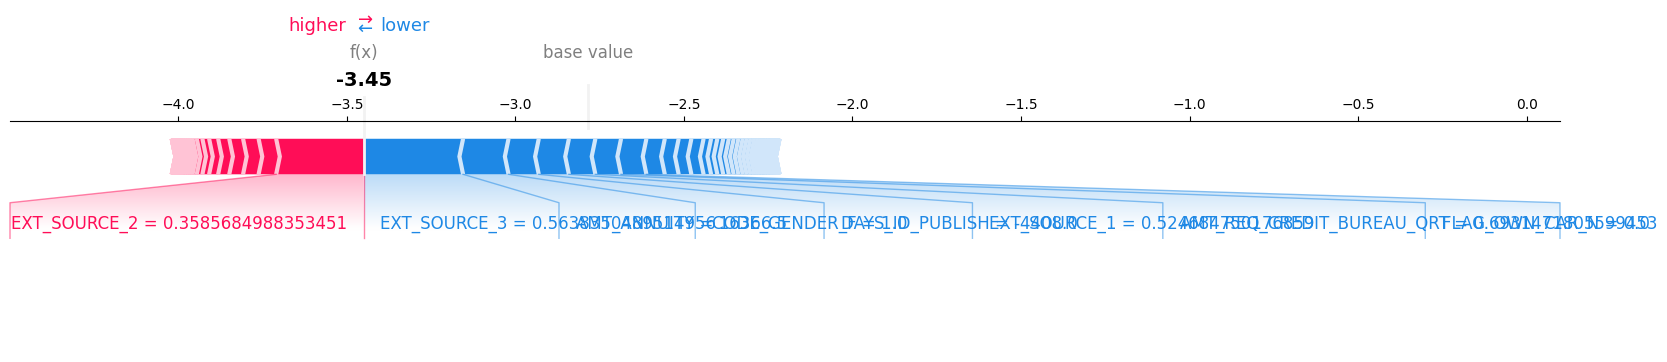

In [ ]:
shap.force_plot(explainer.expected_value, shap_values_train[0, :], X_train.iloc[0, :],     matplotlib=True)

### SHAP Feature Importance구하기 & Feature Selection

* `Feature Selection` : 사용하지 않을 변수를 제외해, 메모리와 학습시간 등을 절약
  * Feature Selection은 트리기반의 부스팅/배깅모델에서는 성능이 좋아지는 경우가 많지 않음
    * 떨어지는 경우가 많으며, **데이터 많이 넣는 쪽이 오히려 성능이 좋기도 함** (Trade-off)
    * 그러나, 메모리 등 **리소스적인 한계로 활용하게 될 가능성이 큼**(+학습시간 줄이기 등)

In [ ]:
# Train데이터의 Feature Importance(절대값의 평균)
shap_fi_train = df_shap_train.apply(lambda x : np.mean(np.abs(x)), axis = 0).sort_values()[::-1]

# Feature Importance가 0인 값을 제외
selected_features = shap_fi_train[shap_fi_train > 0].index.tolist()

# Feature Importance가 0이상인 값
print(f"* 전체 feature의 수 : {len(shap_fi_train)}")
print(f"* 추려진 feature의 수 : {len(selected_features)}")
print("* 추려진 feature 목록\n", selected_features)

* 전체 feature의 수 : 131
* 추려진 feature의 수 : 109
* 추려진 feature 목록
 ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE_Encoded', 'AMT_ANNUITY', 'DAYS_BIRTH', 'CODE_GENDER_F', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_OWN_CAR_N', 'CODE_GENDER_M', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_FAMILY_STATUS', 'FLAG_DOCUMENT_3', 'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT_W_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'NAME_INCOME_TYPE', 'FLAG_WORK_PHONE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'REG_CITY_NOT_LIVE_CITY', 'FLOORSMAX_AVG', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_INCOME_TOTAL', 'TOTALAREA_MODE', 'WEEKDAY_APPR_PROCESS_START', 'APARTMENTS_MEDI', 'AMT_REQ_CREDIT_BUREAU_DAY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'APARTMENTS_AVG', 'SK_ID_CURR', 'FLAG_DOCUMENT_16', 'YEARS

* SHAP으로 Feature Selection한 뒤의 결과 비교
  * 아래 모델/데이터를 기준으로, 성능에서 크게 차이나지 않음

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# 전체 변수 데이터
print("전체 데이터로 학습")

## Full Model
full_model = LGBMClassifier(class_weight="balanced", random_state=42)
full_model.fit(X_train, y_train)

## Full Pred
y_pred_full = full_model.predict(X_test)
y_proba_full = full_model.predict_proba(X_test)

## Full Results
accuracy_full = accuracy_score(y_test, y_pred_full)
auc_full = roc_auc_score(y_test, y_proba_full[:, 1])
cf_full = confusion_matrix(y_test, y_pred_full)


# Feature selection된 데이터
print("\nFeature selection된 데이터로 학습")

X_train_filtered = X_train.loc[:, selected_features]
X_test_filtered = X_test.loc[:, selected_features]

## Filtered Model
filtered_model  = LGBMClassifier(class_weight="balanced", random_state=42)
filtered_model.fit(X_train_filtered, y_train)

## Filtered Pred
y_pred_filtered = filtered_model.predict(X_test_filtered)
y_proba_filtered = filtered_model.predict_proba(X_test_filtered)

## Filtered Results
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
auc_filtered = roc_auc_score(y_test, y_proba_filtered[:, 1])
cf_filtered = confusion_matrix(y_test, y_pred_filtered)

전체 데이터로 학습
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11686
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

Feature selection된 데이터로 학습
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

In [ ]:
print(f'모든 변수를 사용한 정확도 : {round(accuracy_full,4)}')
print(f'무의미한 변수를 삭제한 정확도 : {round(accuracy_filtered,4)}')
print(cf_full)
print('-'*100)
print(f'모든 변수를 사용한 AUC : {round(auc_full,4)}')
print(f'무의미한 변수를 삭제한 AUC : {round(auc_filtered,4)}')
print(cf_filtered)

모든 변수를 사용한 정확도 : 0.703
무의미한 변수를 삭제한 정확도 : 0.7028
[[39914 16640]
 [ 1629  3320]]
----------------------------------------------------------------------------------------------------
모든 변수를 사용한 AUC : 0.7578
무의미한 변수를 삭제한 AUC : 0.7577
[[39908 16646]
 [ 1634  3315]]


## 기타 참고사항

* 실제로는 모델학습이 끝난 후에도, `feature importance구하기-무의미한 변수 제거하기-(파생변수생성)-모델학습`의 반복적 수행
  * 처음에는 간단히 베이스모델을 만들어, SHAP로 1차로 무의미한 변수를 걸러냄
  * 베스트 모델을 추려낸 후, 오래걸리는 파라미터 튜닝을 퇴근시간 등 활용해 처리

* 현업케이스 참고
  * 카드사 내부적으로 마케팅을 위해 이탈고객, 휴면예정고객 등에 대한 분석(산출)을 DA에게 의뢰
    * 혜택을 줄여 Mass마케팅 or 예상되는 이탈고객에게 Target마케팅
    * 위를 위한 모델을 만들어달라는 의뢰를 받아, 데이터마트 생성과 모델링 등을 수행
    * 중간에 프로모션을 해보며 개선한 뒤, 최종적으로 이탈가능성이 높은 고객을 추려 현업(마케팅)에서 계획 수립
    * 지속하게되는 경우, 'Batch개발'을 통해 `데이터마트(Input데이터)-모델Output의 데이터마트 저장-현업에서 활용`을 자동화
    * Batch로 운영되는 모델은 주기적으로 고도화되기도 함(모델의 Metric이 아닌, 현업에서 보는 안정성관련 모니터링 지표 등을 확인)
  * 고객센터에서 통화내용의 Speech-to-text로 토픽모델링을 활용해, 고객이 하고픈 말이 어떤 것인지 찾아내는 NLP과제도 있음

* Case별 Metric을 선택할 시각 키우는 방법
  * 다양한 대회(공모전)의 케이스를 참고 (주로 쓰이는 것이 몇가지 있다)
  * 논문 참고하기(성능을 표기한 Metric참고)
    * SQuAD(LLM을 평가하는 문제지 같은 것)에 대한 성능표기나, SOTA 등 참고
    * NLP newsletter(요즘 핫한 NLP모델 논문을 매주 보내주는 글)
      * CAG(↔RAG) : 처리용량이 커졌으므로, 검색이 아니라 데이터를 캐시에 모두 넣고 실행
        * 런타임 오류 감소 등 의외로 성능이 좋았음
  * Metric을 정하는 것은 지속하다보면 익숙해질 수 있는 부분

* Metric에서 보통 제공하지 않는 Pinball loss등이 필요한 경우
  * 모델학습이 loss를 줄이는 방향이라는 관점에서 맞춰주는 것이 좋음
  * 없으면 커스텀함수로 만들어서 맞추는 편(다만 크게 차이가 나지는 않는다)
  * Loss함수를 일치시켜서 얻는 이득이 큰 편(일부라도 성능올리기 위해 하이퍼파라미터 튜닝 등을 한다는 관점에서 볼 때)

## 과제

* 지난 주에 모델 학습을 시켜본 뒤 모델에 대해 SHAP을 통해 FI를 구해보세요.
* Feature Selection을 진행 한 뒤 재학습을 진행해 보세요.
* 재학습한 모델에 대해 SHAP의 다양한 시각화를 통해 변수들의 설명력을 구해보세요.